# DSC 200 - Lecture 9

## Matplotlib continued, Pandas Introduction

## Titles, Legends, colorbars and annotations

Matplotlib has convenience functions for the addition of plot elements such as titles, legends, colorbars and text based annotation.

The ``suptitle`` pyplot function allows us to set the title of a figure, and the ``set_title`` method on an Axes artist allows us to set the title of an individual axes. Additionally Axes artists have methods named ``set_xlabel`` and ``set_ylabel`` to label the respective x and y Axis artists (that's Axis, not Axes). Finally, we can add text, located by data coordinates, with the ``text`` method on an Axes artist.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

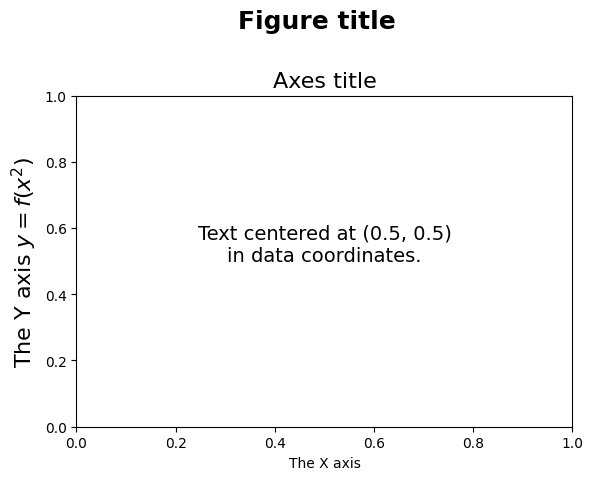

In [3]:
fig = plt.figure()
ax = plt.axes()
# Adjust the created axes so its topmost extent is 0.8 of the figure.
fig.subplots_adjust(top=0.8)
fig.suptitle('Figure title', fontsize=18, fontweight='bold')
ax.set_title('Axes title', fontsize=16)
ax.set_xlabel('The X axis')
ax.set_ylabel('The Y axis $y=f(x^2)$', fontsize=16)
ax.text(0.5, 0.5, 'Text centered at (0.5, 0.5)\nin data coordinates.',
        horizontalalignment='center', fontsize=14)
plt.show()

The creation of a legend is as simple as adding a "label" to lines of interest. This can be done in the call to ``plt.plot`` and then followed up with a call to ``plt.legend``:

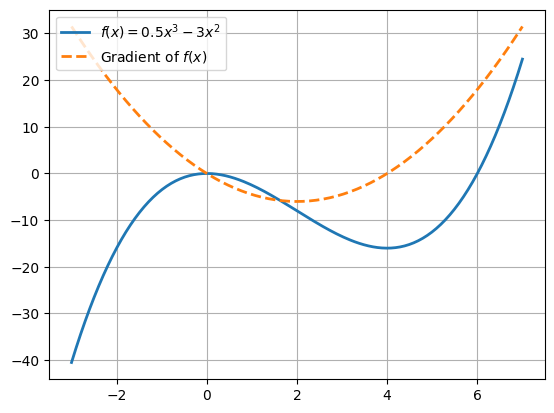

In [4]:
x = np.linspace(-3, 7, 200)
plt.plot(x, 0.5 * x ** 3 - 3 * x ** 2, linewidth=2,
         label='$f(x)=0.5x^3-3x^2$')
plt.plot(x, 1.5 * x ** 2 - 6 * x, linewidth=2, linestyle='--',
         label='Gradient of $f(x)$', )
plt.legend(loc='upper left')
plt.grid()
plt.show()

Colorbars are created with the ``plt.colorbar`` function:

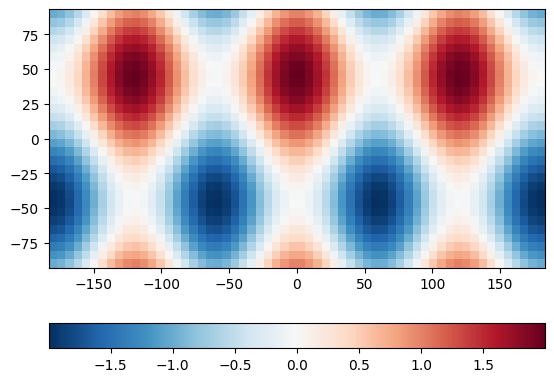

In [6]:
x = np.linspace(-180, 180, 60)
y = np.linspace(-90, 90, 30)
x2d, y2d = np.meshgrid(x, y)
data = np.cos(3 * np.deg2rad(x2d)) + np.sin(2 * np.deg2rad(y2d))

plt.pcolormesh(x, y, data, cmap='RdBu_r')
plt.colorbar(orientation='horizontal')
plt.show()

Matplotlib comes with powerful annotation capabilities, which  are described in detail at http://matplotlib.org/users/annotations_intro.html.

The annotation's power can mean that the syntax is a little harder to read, which is demonstrated by one of the simplest examples of using annotate.

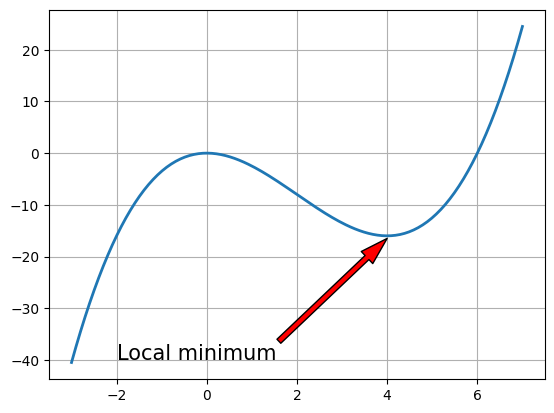

In [10]:
x = np.linspace(-3, 7, 200)
plt.plot(x, 0.5*x**3 - 3*x**2, linewidth=2)
plt.annotate('Local minimum',
             xy=(4, -16.5),
             xytext=(-2, -40), fontsize=15,
             arrowprops={'facecolor': 'red', 'headlength': 20})
plt.grid()
plt.show()

## Saving your plots

You can save a figure using **`plt.savefig`**. This function accepts a filename as input, and saves the current figure to the given file. The format of the file is inferred from the file extension:

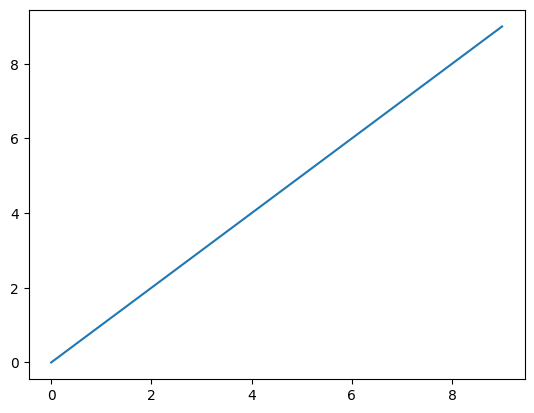

In [ ]:
plt.plot(range(10))
plt.savefig('my_plot.png')

In [12]:
from IPython.display import Image
Image(filename='my_plot.png') 

FileNotFoundError: [Errno 2] No such file or directory: 'my_plot.png'

Matplotlib supports many output file formats, including most commonly used ones. You can see a list of the supported file formats including the filename extensions they are recognised by with:

In [13]:
plt.gcf().canvas.get_supported_filetypes_grouped()

{'Encapsulated Postscript': ['eps'],
 'Joint Photographic Experts Group': ['jpeg', 'jpg'],
 'Portable Document Format': ['pdf'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Network Graphics': ['png'],
 'Postscript': ['ps'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz'],
 'Tagged Image File Format': ['tif', 'tiff'],
 'WebP Image Format': ['webp']}

<Figure size 640x480 with 0 Axes>

## Further steps

Matplotlib has extremely comprehensive documentation at http://matplotlib.org/. Particularly useful parts for beginners are the pyplot summary and the example gallery:

* pyplot summary: http://matplotlib.org/api/pyplot_summary.html
* example gallery: http://matplotlib.org/examples/index.html


## Introduction to Pandas

<div style="text-align: center;">
    <img width="40%" src="https://hips.hearstapps.com/elleuk.cdnds.net/16/36/3200x1599/gallery-1473083573-pandas.jpg" alt="Waving panda" style="min-width: 400px">
    <div><small><em><a href="https://www.elle.com/uk/life-and-culture/culture/news/a31745/10-ways-to-celebrate-pandas-no-longer-being-endangered/">Source</a></em></small></div>
</div>

Pandas is a powerful library especially designed to work with tabular data and has powerful time-series analsysi tools

These slides lean heavily on a fantastic [Pandas Workshop](https://github.com/stefmolin/pandas-workshop/tree/main) put together by Stefanie Molin.

We will begin by introducing the `Series`, `DataFrame`, and `Index` classes, which are the basic building blocks of the pandas library, and showing how to work with them. By the end of this section, you will be able to create DataFrames and perform operations on them to inspect and filter the data.

In [ ]:
#%pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 13.4 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.0 MB 12.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.0 MB 12.1 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 11.5 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd

## Anatomy of a DataFrame

A **DataFrame** is composed of one or more **Series**. The names of the **Series** form the column names, and the row labels form the **Index**.

In [39]:
meteorites = pd.read_csv('../data/Meteorite_Landings.csv', nrows=5)
meteorites

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


*Source: [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh)*

#### Series:

In [40]:
meteorites.name

0      Aachen
1      Aarhus
2        Abee
3    Acapulco
4     Achiras
Name: name, dtype: object

#### Columns:

In [41]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

#### Index:

In [42]:
meteorites.index

RangeIndex(start=0, stop=5, step=1)

## Creating DataFrames

We can create DataFrames from a variety of sources such as other Python objects, flat files, webscraping, and API requests. Here, we will see just a couple of examples, but be sure to check out [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) in the documentation for a complete list.

### Using a flat file

In [43]:
import pandas as pd

meteorites = pd.read_csv('../data/Meteorite_Landings.csv')

### From scratch

Another common approach is using a dictionary as the argument to `pd.DataFrame()`

In [44]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

pd.DataFrame(data)

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


We can also specify an index:

In [45]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

pd.DataFrame(data, index = ['Ke', 'Julian', 'Duong', 'Andreas'])

,apples,oranges
Ke,3,0
Julian,2,3
Duong,0,7
Andreas,1,2


If we have an existing DataFrame we can also specify the index using `set_index()`

In [46]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2],
    'names': ['Ke', 'Julian', 'Duong', 'Andreas']
}

df = pd.DataFrame(data)
df

,apples,oranges,names
0,3,0,Ke
1,2,3,Julian
2,0,7,Duong
3,1,2,Andreas


In [47]:
df.set_index('names')

,apples,oranges
names,,
Ke,3,0
Julian,2,3
Duong,0,7
Andreas,1,2


### Using data from an API

Collect the data from [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) using the Socrata Open Data API (SODA) with the `requests` library:

**Currently not working due to government shutdown**

In [48]:
# import requests

# response = requests.get(
#     'https://data.nasa.gov/resource/gh4g-9sfh.json',
#     params={'$limit': 50_000}
# )

# if response.ok:
#     payload = response.json()
# else:
#     print(f'Request was not successful and returned code: {response.status_code}.')
#     payload = None

Create the DataFrame with the resulting payload:

In [51]:
# import pandas as pd

# df = pd.DataFrame(payload)
# df.head(3)

*Tip: `df.to_csv('data.csv')` writes this data to a new file called `data.csv`.*

## Inspecting the data
Now that we have some data, we need to perform an initial inspection of it. This gives us information on what the data looks like, how many rows/columns there are, and how much data we have. 

Let's inspect the `meteorites` data.

#### How many rows and columns are there?

In [53]:
meteorites.shape

(45716, 10)

#### What are the column names?

In [54]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

#### What type of data does each column currently hold?

In [55]:
meteorites.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

#### What does the data look like?

In [56]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


Sometimes there may be extraneous data at the end of the file, so checking the bottom few rows is also important:

In [57]:
meteorites.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,01/01/1976 12:00:00 AM,33.98333,-115.68333,"(33.98333, -115.68333)"


#### Get some information about the DataFrame

In [58]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


## Extracting subsets

A crucial part of working with DataFrames is extracting subsets of the data: finding rows that meet a certain set of criteria, isolating columns/rows of interest, etc. After narrowing down our data, we are closer to discovering insights. This section will be the backbone of many analysis tasks.

#### Selecting columns

We can select columns as attributes if their names would be valid Python variables:

In [59]:
meteorites.name

0            Aachen
1            Aarhus
2              Abee
3          Acapulco
4           Achiras
            ...    
45711    Zillah 002
45712        Zinder
45713          Zlin
45714     Zubkovsky
45715    Zulu Queen
Name: name, Length: 45716, dtype: object

If they aren't, we have to select them as keys. However, we can select multiple columns at once this way:

In [60]:
meteorites[['name', 'mass (g)']]

,name,mass (g)
0,Aachen,21.0
1,Aarhus,720.0
2,Abee,107000.0
3,Acapulco,1914.0
4,Achiras,780.0
...,...,...
45711,Zillah 002,172.0
45712,Zinder,46.0
45713,Zlin,3.3
45714,Zubkovsky,2167.0


#### Selecting rows

In [61]:
meteorites[100:104]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
100,Benton,5026,Valid,LL6,2840.0,Fell,01/01/1949 12:00:00 AM,45.95000,-67.55000,"(45.95, -67.55)"
101,Berduc,48975,Valid,L6,270.0,Fell,01/01/2008 12:00:00 AM,-31.91000,-58.32833,"(-31.91, -58.32833)"
102,Béréba,5028,Valid,Eucrite-mmict,18000.0,Fell,01/01/1924 12:00:00 AM,11.65000,-3.65000,"(11.65, -3.65)"
103,Berlanguillas,5029,Valid,L6,1440.0,Fell,01/01/1811 12:00:00 AM,41.68333,-3.80000,"(41.68333, -3.8)"


#### Indexing

We use `iloc[]` to select rows and columns by their position:

In [62]:
meteorites.iloc[100:104, [0, 3, 4, 6]]

,name,recclass,mass (g),year
100,Benton,LL6,2840.0,01/01/1949 12:00:00 AM
101,Berduc,L6,270.0,01/01/2008 12:00:00 AM
102,Béréba,Eucrite-mmict,18000.0,01/01/1924 12:00:00 AM
103,Berlanguillas,L6,1440.0,01/01/1811 12:00:00 AM


We use `loc[]` to select by name:

In [66]:
meteorites.loc[100:104, 'mass (g)':'year']

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM
104,960.0,Fell,01/01/2004 12:00:00 AM


#### Filtering with Boolean masks

A **Boolean mask** is a array-like structure of Boolean values &ndash; it's a way to specify which rows/columns we want to select (`True`) and which we don't (`False`).

Here's an example of a Boolean mask for meteorites weighing more than 50 grams that were found on Earth (i.e., they were not observed falling):

In [73]:
(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')

0        False
1        False
2        False
3        False
4        False
         ...  
45711     True
45712    False
45713    False
45714     True
45715     True
Length: 45716, dtype: bool

**Important**: Take note of the syntax here. We surround each condition with parentheses, and we use bitwise operators (`&`, `|`, `~`) instead of logical operators (`and`, `or`, `not`).

We can use a Boolean mask to select the subset of meteorites weighing more than 1 million grams (1,000 kilograms or roughly 2,205 pounds) that were observed falling:

In [75]:
meteorites[(meteorites['mass (g)'] > 1e6) & (meteorites.fall == 'Fell')]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
29,Allende,2278,Valid,CV3,2000000.0,Fell,01/01/1969 12:00:00 AM,26.96667,-105.31667,"(26.96667, -105.31667)"
419,Jilin,12171,Valid,H5,4000000.0,Fell,01/01/1976 12:00:00 AM,44.05000,126.16667,"(44.05, 126.16667)"
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,01/01/1998 12:00:00 AM,42.25000,59.20000,"(42.25, 59.2)"
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,01/01/1948 12:00:00 AM,39.68333,-99.86667,"(39.68333, -99.86667)"
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM,46.16000,134.65333,"(46.16, 134.65333)"


*Tip: Boolean masks can be used with `loc[]` and `iloc[]`.*

An alternative to this is the `query()` method:

In [ ]:
meteorites.query("`mass (g)` > 1e6 and fall == 'Fell'")

*Tip: Here, we can use both logical operators and bitwise operators.*

## Calculating summary statistics

In the next section of this workshop, we will discuss data cleaning for a more meaningful analysis of our datasets; however, we can already extract some interesting insights from the `meteorites` data by calculating summary statistics.

#### How many of the meteorites were found versus observed falling?

In [ ]:
meteorites.fall.value_counts()

*Tip: Pass in `normalize=True` to see this result as percentages. Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) for additional functionality.*

#### What was the mass of the average meterorite?

In [ ]:
meteorites['mass (g)'].mean()

**Important**: The mean isn't always the best measure of central tendency. If there are outliers in the distribution, the mean will be skewed. Here, the mean is being pulled higher by some very heavy meteorites &ndash; the distribution is [right-skewed](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/).

Taking a look at some quantiles at the extremes of the distribution shows that the mean is between the 95th and 99th percentile of the distribution, so it isn't a good measure of central tendency here:

In [ ]:
meteorites['mass (g)'].quantile([0.01, 0.05, 0.5, 0.95, 0.99])

A better measure in this case is the median (50th percentile), since it is robust to outliers:

In [ ]:
meteorites['mass (g)'].median()

#### What was the mass of the heaviest meteorite?

In [ ]:
meteorites['mass (g)'].max()

Let's extract the information on this meteorite:

In [ ]:
meteorites.loc[meteorites['mass (g)'].idxmax()]

*Fun fact: This meteorite landed in Namibia and is a tourist attraction.*

<div>
    <img width="25%" style="margin-top: -5px; margin-bottom: -5px; min-width: 200px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Hoba_meteorite_%2815682150765%29.jpg/1280px-Hoba_meteorite_%2815682150765%29.jpg" alt="Hoba meteorite (source: Wikipedia)"/>
    <div><small><em>Source: Wikipedia</em></small></div>
</div>

#### How many different types of meteorite classes are represented in this dataset?

In [ ]:
meteorites.recclass.nunique()

Some examples:

In [ ]:
meteorites.recclass.unique()[:14]

*Note: All fields preceded with "rec" are the values recommended by The Meteoritical Society. Check out [this Wikipedia article](https://en.wikipedia.org/wiki/Meteorite_classification) for some information on meteorite classes.*

#### Get some summary statistics on the data itself
We can get common summary statistics for all columns at once. By default, this will only be numeric columns, but here, we will summarize everything together:

In [ ]:
meteorites.describe(include='all')

**Important**: `NaN` values signify missing data. For instance, the `fall` column contains strings, so there is no value for `mean`; likewise, `mass (g)` is numeric, so we don't have entries for the categorical summary statistics (`unique`, `top`, `freq`).

#### Check out the documentation for more descriptive statistics:

- [Series](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats)
- [DataFrame](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

## Group-by operations

Rather than perform aggregations, like `mean()` or `describe()`, on the full dataset at once, we can perform these calculations per group by first calling `groupby()`:

In [ ]:
import numpy as np
meteorites.groupby('recclass').describe(include=np.number)

In [ ]:
meteorites.groupby('recclass')['mass (g)'].mean().head()

In [ ]:
meteorites.groupby('recclass').agg({'mass (g)':['mean', 'std'], 'name': ['count']}).head()

We are only scratching the surface; some additional functionalities to be aware of include the following:
- We can group by multiple columns &ndash; this creates a hierarchical index.
- Groups can be excluded from calculations with the `filter()` method.
- We can group on content in the index using the `level` or `name` parameters e.g., `groupby(level=0)` or `groupby(name='year')`.
- We can group by date ranges if we use a `pd.Grouper()` object.